# **Tp sur le dataset IRIS**

#### **Description du dataset iris**

Notre étude est basée sur un jeu de données appelées **iris** qui contient 3 types de fleurs donc sur un **virginica** , **setosa** , **versicolor** constituent chaque d'elle de **50 instances** alors sur au total **150 ligne** pour le dataset et possède également 04 caractéristiques chacun qui la **longueur** et la **largeur** des **pétales** et **sépales**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


# **1. importation des librairies necessaires**

In [4]:
# Importation des bibliothèques nécessaires pour l'environnement
import pandas as pd  # Bibliothèque pour la manipulation des données sous forme de DataFrame
import numpy as np  # Bibliothèque pour les calculs numériques et les tableaux multidimensionnels
import sklearn.metrics as sm  # Module pour les métriques d'évaluation de modèles
import matplotlib.pyplot as plt  # Bibliothèque pour la visualisation des données
import seaborn as sns
# Importation des modules spécifiques de scikit-learn


## **2. Chargement des donnees**

In [5]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **3. Analyse et pre traitement des donnees**

In [6]:
# observons le type de donnees dans notre dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
df.isna().sum().sum()

0

In [7]:
df.Species.value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [11]:
df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].describe().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


le jeux de donnees iris contient les attributs ou caracterisiques suivant **SepalLengthCm** ,**SepalWidthCm** , **PetalLengthCm**,**PetalWidthCm**qui sont des reels et la colonne cible ou targert qui est Species. On constate qu'il ya pas de valeur manquantes et la distributions sur la colonne cible est uniforme. chaque variables **SepalLengthCm** ou **longuer de sepale** la moyenne est sensiblement egale a la mediane pareil que pour **SepalWidthCm** elle es plus petite que la mediane pour PetalLengthCm	,PetalWidthCm.

## **3.1 Visualisation du dataset**

<Axes: xlabel='Species', ylabel='count'>

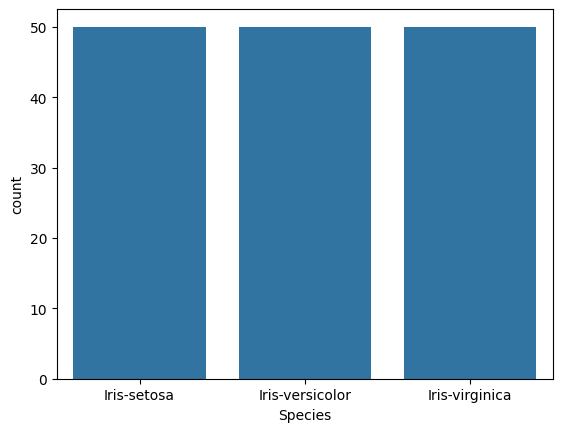

In [9]:
# on vas regarder si la base de donnees est equilibre
sns.countplot(x="Species",data =df)

Mettre les **features** dans X et les **labels** dans Y

In [13]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y =df['Species']

In [11]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y.head(150)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [15]:
A=df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]

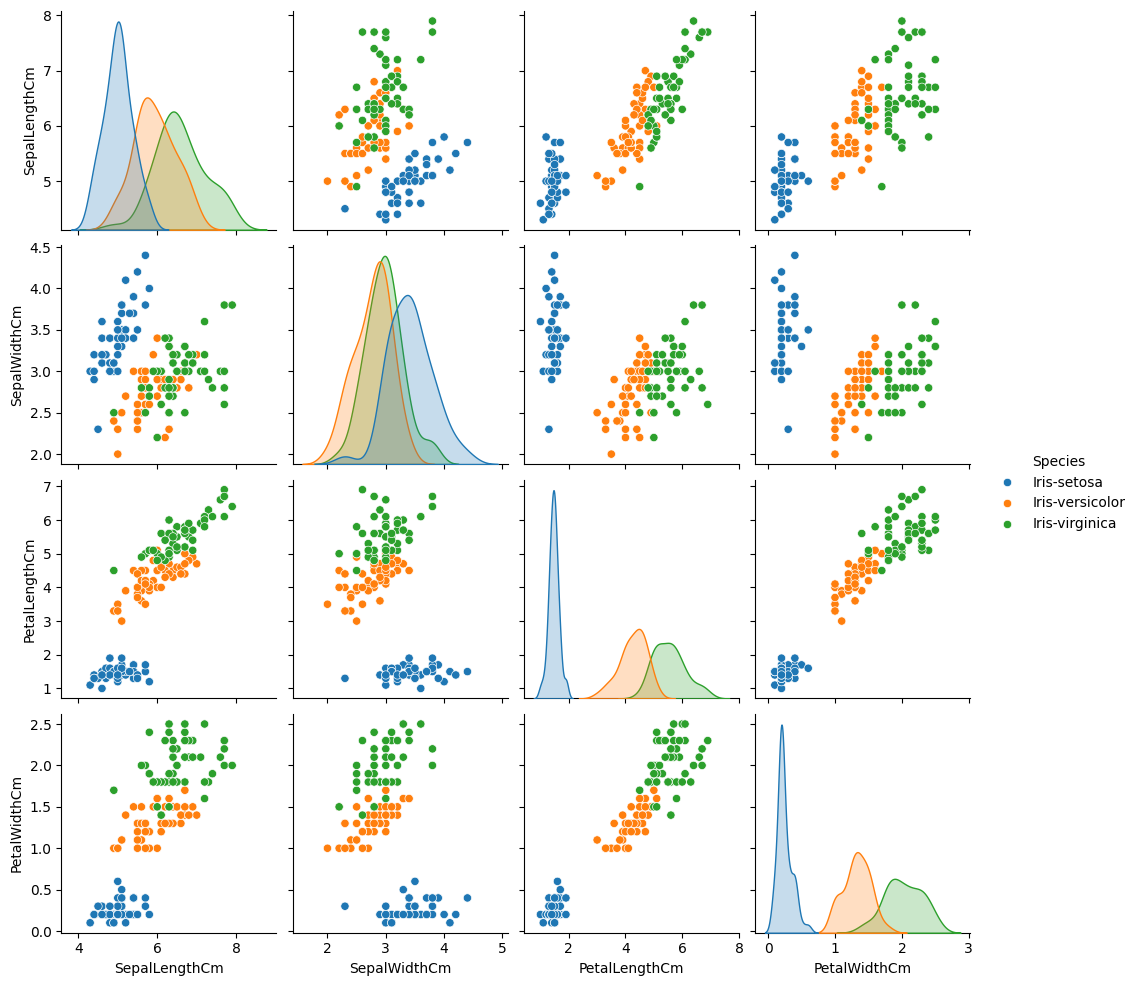

In [16]:
# Ce graphe nous permet de visualiser les donnees enfin de connaitre le modele qu'on doit utiliser
sns.pairplot(A,hue='Species', height=2.5)
plt.show()

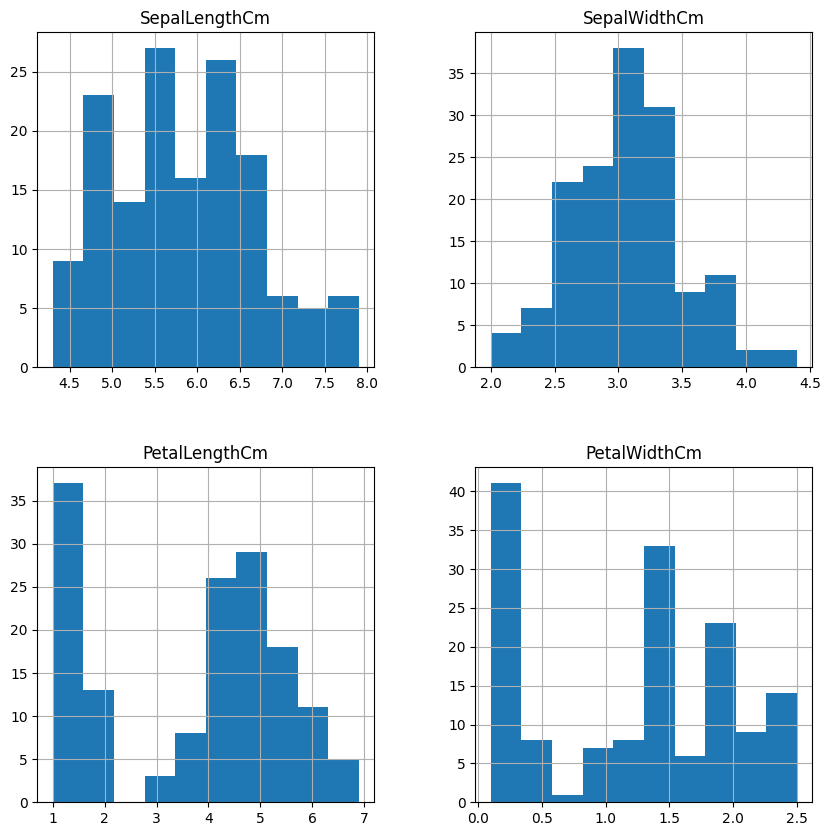

In [18]:
#histogramme de chaque colonnes
A.hist(figsize=(10,10))
plt.show()

## on constate nous pouvons separer des autre fleures de setosa en ulisant un separateur lineaire alors nous pourrons utiliser les algorithmes candidat telque **SVM**,**arbre de decisison**, **knn**, **regression logistique**.

normalisation du jeux de donnees

In [22]:
from sklearn.preprocessing import StandardScaler
# On instancie le modele StandardScaler
scaler = StandardScaler()


In [24]:
# on fait passer la fonction standarscaler sur les donnees X
A_norm = scaler.fit(X)

In [25]:
A_norm

StandardScaler()

In [31]:
# transforme nos données
A_transf = scaler.transform(X)

on divise le jeux de donnes en deux parties un jeux d'entrainement et jeux de test


on divise avec 60% pour le jeux d'entrainement et 40% pour le jeux de tesT

In [ ]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y =df['Species']

In [32]:
from sklearn.model_selection import train_test_split
# ramdom state c est un etat pour la fonction aleatoire pour assurer la reproductibilité (le même découpage sera effectué à chaque exécution).
X_train,X_test,Y_train,Y_test = train_test_split(A_transf,Y,test_size=0.3,random_state=42)

In [33]:
X_train

array([[-4.16009689e-01, -1.51337539e+00, -3.33612130e-02,
        -2.61192967e-01],
       [ 5.53333275e-01, -5.87763531e-01,  7.62758643e-01,
         3.96171883e-01],
       [ 6.74501145e-01,  1.06445364e-01,  9.90221459e-01,
         7.90590793e-01],
       [ 9.16836886e-01, -1.24957601e-01,  3.64698715e-01,
         2.64698913e-01],
       [ 1.64384411e+00,  1.26346019e+00,  1.33141568e+00,
         1.71090158e+00],
       [-1.73673948e-01, -3.56360566e-01,  2.50967307e-01,
         1.33225943e-01],
       [ 2.12851559e+00, -1.24957601e-01,  1.61574420e+00,
         1.18500970e+00],
       [-2.94841818e-01, -1.24957601e-01,  4.21564419e-01,
         3.96171883e-01],
       [-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [ 2.24968346e+00, -5.87763531e-01,  1.67260991e+00,
         1.05353673e+00],
       [-5.25060772e-02, -8.19166497e-01,  1.94101603e-01,
        -2.61192967e-01],
       [-7.79513300e-01,  8.00654259e-01, -1.34127240e+00,
      

In [34]:
Y_train

,Species
81,Iris-versicolor
133,Iris-virginica
137,Iris-virginica
75,Iris-versicolor
109,Iris-virginica
...,...
71,Iris-versicolor
106,Iris-virginica
14,Iris-setosa
92,Iris-versicolor


# **4. Contruction du modele avec l'algorithme kNN**



In [ ]:
# courbe d'entropie qui nous permet de selectionner le bon nombre de voisin




In [37]:
from sklearn.neighbors import KNeighborsClassifier
# instancier notre modele
kNN = KNeighborsClassifier(n_neighbors=4)


entraine notre modele

In [38]:
kNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

# **5. prediction et evaluation du modele**

pour la prediction on vas faire un knn.predicte sur les donnees de text misent a l echelle

In [46]:
y_pred = kNN.predict(X_test)

In [76]:
R=[5.3 , 3.2 , 2.4 ,1.2]
R_pred = kNN.predict([R])
R_pred

array(['Iris-virginica'], dtype=object)

### Evaluation du modele

 Dans le but de voir si le model est efficace ou pas alors on  evaluer notre model on vas utiliser different metrique tels que la matrice de confusion ,precision , le rappel , f1 score

In [47]:
# creer la matrice de confusion
from sklearn import metrics
# aafficher les differentes metrique
print(metrics.classification_report(Y_test,y_pred))
# la matrice de confusion sous forme de vecteur
print(metrics.confusion_matrix(Y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


Chaque ligne représente les vraies classes, et chaque colonne représente les prédictions.

* **Première ligne** [19 0 0] → **Iris-setosa**

  * 23 fois bien classée (23 en diagonale).
  * 0 erreurs → le modèle ne confond jamais Iris-setosa avec une autre classe.

* **Deuxième ligne** [0 13 0] → **Iris-versicolor**

 * 13 fois bien classée.
  * 0 erreur → le modèle ne confond jamais Iris-versicolor  avec une autre classe.
* **Troisième ligne** [0 1 12] → **Iris-virginica**

    * 12 fois bien classée.
    * 1 erreur → Iris-virginica mal classé en Iris-versicolor.

➡️ Erreurs très limitées : Seulement 1 erreurs sur 45 échantillons.

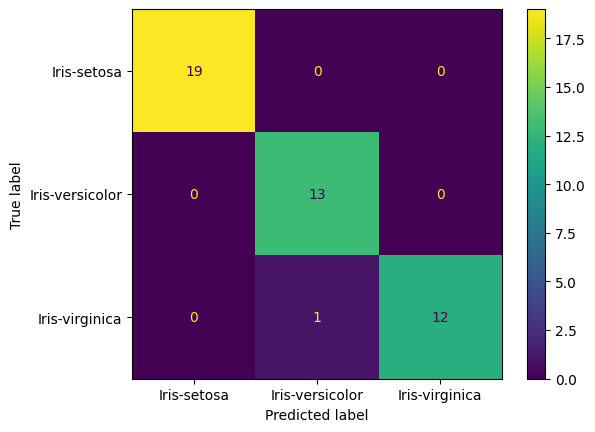

In [41]:
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = kNN.classes_)
cm_display.plot()
plt.show()

In [42]:
# accuracy
metrics.accuracy_score(Y_test,y_pred)


0.9777777777777777

In [49]:
# courbe roc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [55]:
# Import necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(Y_test, classes=kNN.classes_)
y_pred_bin = label_binarize(y_pred, classes=kNN.classes_)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)




{0: 1.0, 1: 0.984375, 2: 0.9615384615384616}


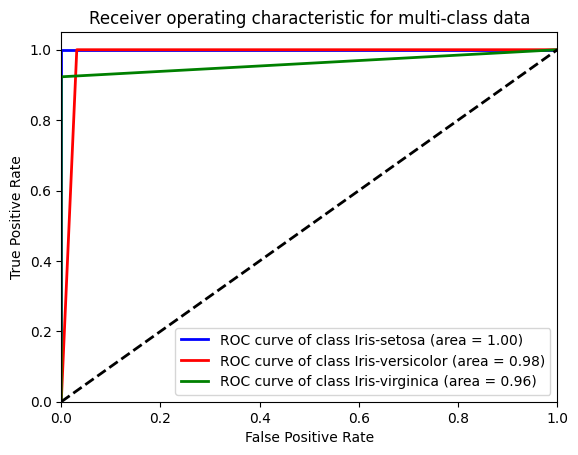

In [51]:
# Import necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(Y_test, classes=kNN.classes_)
y_pred_bin = label_binarize(y_pred, classes=kNN.classes_)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(kNN.classes_[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for multi-class data")
plt.legend(loc="lower right")
plt.show()

### **Analyse de la courbe ROC pour un problème multi-classes**
**1. Explication de la courbe ROC**

La courbe ROC (Receiver Operating Characteristic) est utilisée pour évaluer les performances d'un modèle de classification. Elle représente :

* Axe X : Taux de faux positifs ( False Positive Rate - FPR )
* Axe Y : Taux de vrais positifs ( True Positive Rate - TPR )

Une courbe ROC idéale est proche du coin supérieur gauche (FPR proche de 0 et TPR proche de 1), indiquant un excellent pouvoir discriminant du modèle.

**2. Lecture du graphique**

* Trois courbes ROC sont affichées pour chaque classe :

   * Bleu : Iris-setosa (AUC = 1,00 )
   * Rouge : Iris versicolor (AUC = 0,98 )
   * Vert : Iris virginica (AUC = 0,96 )

* Ligne noire en pointillés : C'est la diagonale aléatoire qui représente un classificateur aléatoire (AUC = 0.5 ). Un bon modèle doit être au-dessus de cette ligne.

**3. Analyser les performances du modèle**

* Iris-setosa (AUC = 1.00)

🔹 Le modèle est parfaitement capable de distinguer cette classe.

🔹 La ​​courbe atteint directement (0,1) , indiquant aucune erreur de classification .

* Iris-versicolor (AUC = 0,98)
* Iris-virginica (AUC = 0,96)

🔹 Très bonne classification pour ces classes.

🔹 Quelques erreurs possibles, mais globalement, le modèle est très performant .

* Score AUC (aire sous la courbe)

 * Un AUC proche de 1 signifie une très bonne performance.
 * Une AUC inférieure à 0,5 signifie que le modèle est pire qu'un choix aléatoire.

# **Conclusion**
✅ Modèle très performant, surtout pour Iris-setosa (aucune erreur).

✅ Quelques confusions possibles entre Iris-versicolor et Iris-virginica, mais le modèle reste excellent.

✅ AUC > 0.95 pour toutes les classes alors le modèle est quasiment optimal.

#I. **Conctruction du modele avec Randomforest**

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=42)


### Entraine le modele

In [57]:
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

### Prediction sur le model

In [58]:
y_pred1 = clf.predict(X_test)

### Evaluation du modele

In [59]:
# creer la matrice de confusion
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred1))
print(metrics.confusion_matrix(Y_test,y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


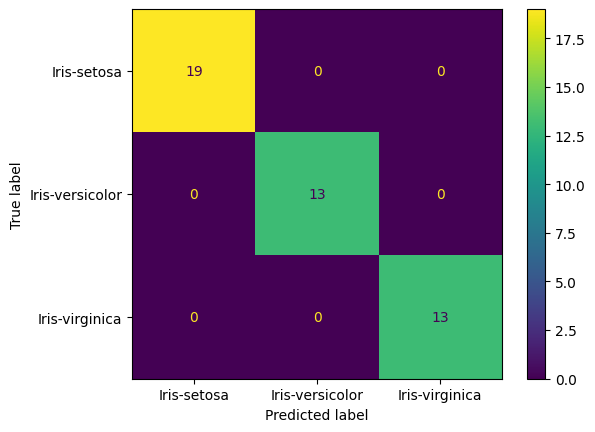

In [60]:
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = kNN.classes_)
cm_display.plot()
plt.show()

Interprétation :
* **Ligne 1** (Iris-setosa) :

  * 19 échantillons de Setosa ont été correctement classés.
  * 0 erreur alors Le modèle identifie parfaitement cette classe.
* **Ligne 2** (Iris-versicolor) :

   * 13 échantillons de Versicolor ont été bien classés.
   * 0 erreur → Aucune confusion avec Setosa ou Virginica.
* **Ligne 3** (Iris-virginica) :

   * 13 échantillons de Virginica sont bien classés.
   * 0 erreur → Aucune confusion avec Setosa ou versicolor.

**Performances globales:**
* Classe Setosa : 100% **de précision** et **de rappel**.
* Classe Versicolor : 100% **de précision** et de **rappel**.
* Classe Virginica :  100% **de précision** et de **rappel**.


In [61]:
metrics.accuracy_score(Y_test,y_pred1)

1.0

In [63]:
# Import necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(Y_test, classes=kNN.classes_)
y_pred_bin = label_binarize(y_pred1, classes=kNN.classes_)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)

{0: 1.0, 1: 1.0, 2: 1.0}


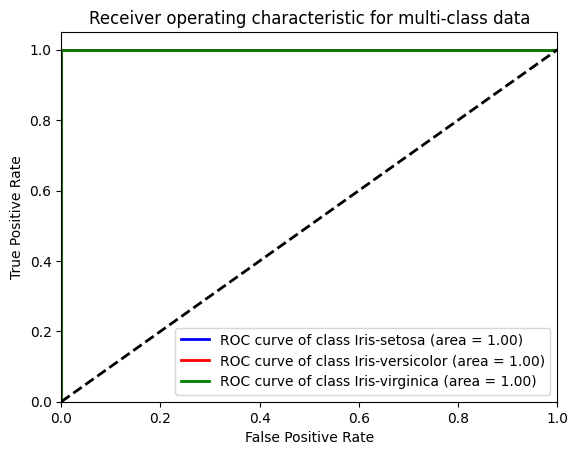

# **Construction du modele avec la regression logistic**

In [65]:
# import les bibiotheque
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report


In [66]:
# Construire le modele
lr = LogisticRegression()

In [67]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [71]:
y_pred2 = lr.predict(X_test)

In [72]:
# creer la matrice de confusion
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred2))
print(metrics.confusion_matrix(Y_test,y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


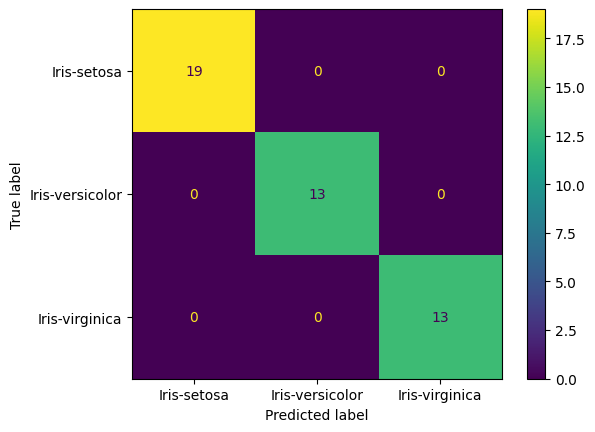

In [73]:
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = kNN.classes_)
cm_display.plot()
plt.show()

In [74]:
# Import necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(Y_test, classes=kNN.classes_)
y_pred_bin = label_binarize(y_pred1, classes=kNN.classes_)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)

{0: 1.0, 1: 1.0, 2: 1.0}


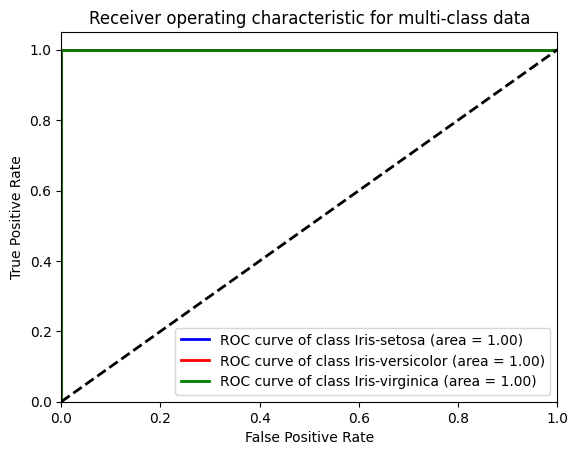

In [75]:
# Import necessary libraries
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(Y_test, classes=kNN.classes_)
y_pred_bin = label_binarize(y_pred2, classes=kNN.classes_)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(kNN.classes_[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic for multi-class data")
plt.legend(loc="lower right")
plt.show()

# **Conclusion generale**

on constate que les modeles obtenu grace aux algorithme de **Machine learning** telques **random forest et la regression lineare** predisent mieux compare a **KNN** et  on egalement un modele plus **performant** car leurs **AUC** est egale a **1**.